In [6]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#read in the url and scrape ticker data
symbol_dict = {'AAPL': 'Apple Inc.', 'MSFT': 'Microsoft Corporation', 'AMZN': 'Amazon.com Inc.', 'FB': 'Facebook Inc. Class A', 'GOOGL': 'Alphabet Inc. Class A', 'GOOG': 'Alphabet Inc. Class C', 'TSLA': 'Tesla Inc', 'BRK-B': 'Berkshire Hathaway Inc. Class B', 'JPM': 'JPMorgan Chase & Co.', 'JNJ': 'Johnson & Johnson', 'V': 'Visa Inc. Class A', 'DIS': 'Walt Disney Company', 'NVDA': 'NVIDIA Corporation', 'PG': 'Procter & Gamble Company', 'UNH': 'UnitedHealth Group Incorporated', 'MA': 'Mastercard Incorporated Class A', 'HD': 'Home Depot Inc.', 'BAC': 'Bank of America Corp', 'INTC': 'Intel Corporation', 'CMCSA': 'Comcast Corporation Class A', 'NFLX': 'Netflix Inc.', 'VZ': 'Verizon Communications Inc.', 'XOM': 'Exxon Mobil Corporation', 'ADBE': 'Adobe Inc.', 'CRM': 'salesforce.com inc.', 'ABT': 'Abbott Laboratories', 'T': 'AT&T Inc.', 'KO': 'Coca-Cola Company', 'CSCO': 'Cisco Systems Inc.', 'CVX': 'Chevron Corporation', 'AVGO': 'Broadcom Inc.', 'MRK': 'Merck & Co. Inc.', 'PFE': 'Pfizer Inc.', 'WMT': 'Walmart Inc.', 'ABBV': 'AbbVie Inc.', 'PEP': 'PepsiCo Inc.', 'TMO': 'Thermo Fisher Scientific Inc.', 'NKE': 'NIKE Inc. Class B', 'ACN': 'Accenture Plc Class A', 'LLY': 'Eli Lilly and Company', 'MDT': 'Medtronic Plc', 'TXN': 'Texas Instruments Incorporated', 'MCD': "McDonald's Corporation", 'QCOM': 'Qualcomm Inc', 'WFC': 'Wells Fargo & Company', 'COST': 'Costco Wholesale Corporation', 'NEE': 'NextEra Energy Inc.', 'HON': 'Honeywell International Inc.', 'DHR': 'Danaher Corporation', 'UNP': 'Union Pacific Corporation', 'C': 'Citigroup Inc.', 'BMY': 'Bristol-Myers Squibb Company', 'LIN': 'Linde plc', 'AMGN': 'Amgen Inc.', 'PM': 'Philip Morris International Inc.', 'LOW': "Lowe's Companies Inc.", 'ORCL': 'Oracle Corporation', 'CAT': 'Caterpillar Inc.', 'SBUX': 'Starbucks Corporation', 'UPS': 'United Parcel Service Inc. Class B', 'BA': 'Boeing Company', 'RTX': 'Raytheon Technologies Corporation', 'MS': 'Morgan Stanley', 'GE': 'General Electric Company', 'GS': 'Goldman Sachs Group Inc.', 'NOW': 'ServiceNow Inc.', 'IBM': 'International Business Machines Corporation', 'AMAT': 'Applied Materials Inc.', 'DE': 'Deere & Company', 'INTU': 'Intuit Inc.', 'AMD': 'Advanced Micro Devices Inc.', 'MMM': '3M Company', 'BLK': 'BlackRock Inc.', 'AMT': 'American Tower Corporation', 'MU': 'Micron Technology Inc.', 'BKNG': 'Booking Holdings Inc.', 'SCHW': 'Charles Schwab Corporation', 'TGT': 'Target Corporation', 'CVS': 'CVS Health Corporation', 'AXP': 'American Express Company', 'CHTR': 'Charter Communications Inc. Class A', 'ISRG': 'Intuitive Surgical Inc.', 'LMT': 'Lockheed Martin Corporation', 'FIS': 'Fidelity National Information Services Inc.', 'TJX': 'TJX Companies Inc', 'MO': 'Altria Group Inc', 'LRCX': 'Lam Research Corporation', 'SYK': 'Stryker Corporation', 'GILD': 'Gilead Sciences Inc.', 'TFC': 'Truist Financial Corporation', 'MDLZ': 'Mondelez International Inc. Class A', 'SPGI': 'S&P Global Inc.', 'PLD': 'Prologis Inc.', 'CI': 'Cigna Corporation', 'CB': 'Chubb Limited', 'ZTS': 'Zoetis Inc. Class A', 'ANTM': 'Anthem Inc.', 'ATVI': 'Activision Blizzard Inc.', 'ADP': 'Automatic Data Processing Inc.', 'PNC': 'PNC Financial Services Group Inc.', 'BDX': 'Becton Dickinson and Company', 'CME': 'CME Group Inc. Class A', 'USB': 'U.S. Bancorp', 'COP': 'ConocoPhillips', 'CSX': 'CSX Corporation', 'CCI': 'Crown Castle International Corp', 'TMUS': 'T-Mobile US Inc.', 'ILMN': 'Illumina Inc.', 'FISV': 'Fiserv Inc.', 'CL': 'Colgate-Palmolive Company', 'EL': 'Estee Lauder Companies Inc. Class A', 'DUK': 'Duke Energy Corporation', 'NSC': 'Norfolk Southern Corporation', 'GM': 'General Motors Company', 'ADSK': 'Autodesk Inc.', 'ICE': 'Intercontinental Exchange Inc.', 'SO': 'Southern Company', 'FDX': 'FedEx Corporation', 'MMC': 'Marsh & McLennan Companies Inc.', 'GPN': 'Global Payments Inc.', 'D': 'Dominion Energy Inc', 'EQIX': 'Equinix Inc.', 'ADI': 'Analog Devices Inc.', 'APD': 'Air Products and Chemicals Inc.', 'TWTR': 'Twitter Inc.', 'ITW': 'Illinois Tool Works Inc.', 'SHW': 'Sherwin-Williams Company', 'VRTX': 'Vertex Pharmaceuticals Incorporated', 'COF': 'Capital One Financial Corporation', 'BSX': 'Boston Scientific Corporation', 'FCX': 'Freeport-McMoRan Inc.', 'EW': 'Edwards Lifesciences Corporation', 'AON': 'Aon Plc Class A', 'PGR': 'Progressive Corporation', 'ECL': 'Ecolab Inc.', 'ETN': 'Eaton Corp. Plc', 'EMR': 'Emerson Electric Co.', 'HUM': 'Humana Inc.', 'KLAC': 'KLA Corporation', 'REGN': 'Regeneron Pharmaceuticals Inc.', 'DG': 'Dollar General Corporation', 'NOC': 'Northrop Grumman Corporation', 'HCA': 'HCA Healthcare Inc', 'NEM': 'Newmont Corporation', 'F': 'Ford Motor Company', 'KMB': 'Kimberly-Clark Corporation', 'IDXX': 'IDEXX Laboratories Inc.', 'MCO': "Moody's Corporation", 'MET': 'MetLife Inc.', 'BIIB': 'Biogen Inc.', 'ROST': 'Ross Stores Inc.', 'WM': 'Waste Management Inc.', 'TEL': 'TE Connectivity Ltd.', 'APTV': 'Aptiv PLC', 'EA': 'Electronic Arts Inc.', 'ALGN': 'Align Technology Inc.', 'ROP': 'Roper Technologies Inc.', 'JCI': 'Johnson Controls International plc', 'MCHP': 'Microchip Technology Incorporated', 'SYY': 'Sysco Corporation', 'EBAY': 'eBay Inc.', 'BAX': 'Baxter International Inc.', 'EXC': 'Exelon Corporation', 'MAR': 'Marriott International Inc. Class A', 'CMG': 'Chipotle Mexican Grill Inc.', 'EOG': 'EOG Resources Inc.', 'LHX': 'L3Harris Technologies Inc', 'DXCM': 'DexCom Inc.', 'CTSH': 'Cognizant Technology Solutions Corporation Class A', 'GD': 'General Dynamics Corporation', 'AEP': 'American Electric Power Company Inc.', 'SNPS': 'Synopsys Inc.', 'SLB': 'Schlumberger NV', 'DLR': 'Digital Realty Trust Inc.', 'AIG': 'American International Group Inc.', 'APH': 'Amphenol Corporation Class A', 'TRV': 'Travelers Companies Inc.', 'SPG': 'Simon Property Group Inc.', 'STZ': 'Constellation Brands Inc. Class A', 'HPQ': 'HP Inc.', 'A': 'Agilent Technologies Inc.', 'PSX': 'Phillips 66', 'CMI': 'Cummins Inc.', 'CDNS': 'Cadence Design Systems Inc.', 'PSA': 'Public Storage', 'PH': 'Parker-Hannifin Corporation', 'DD': 'DuPont de Nemours Inc.', 'TT': 'Trane Technologies plc', 'IQV': 'IQVIA Holdings Inc', 'TROW': 'T. Rowe Price Group', 'MPC': 'Marathon Petroleum Corporation', 'BK': 'Bank of New York Mellon Corporation', 'SRE': 'Sempra Energy', 'WBA': 'Walgreens Boots Alliance Inc', 'GIS': 'General Mills Inc.', 'IFF': 'International Flavors & Fragrances Inc.', 'MSCI': 'MSCI Inc. Class A', 'CNC': 'Centene Corporation', 'HLT': 'Hilton Worldwide Holdings Inc', 'PRU': 'Prudential Financial Inc.', 'ZBH': 'Zimmer Biomet Holdings Inc.', 'LUV': 'Southwest Airlines Co.', 'ALXN': 'Alexion Pharmaceuticals Inc.', 'INFO': 'IHS Markit Ltd.', 'ORLY': "O'Reilly Automotive Inc.", 'TDG': 'TransDigm Group Incorporated', 'ALL': 'Allstate Corporation', 'MNST': 'Monster Beverage Corporation', 'XEL': 'Xcel Energy Inc.', 'PCAR': 'PACCAR Inc', 'ANSS': 'ANSYS Inc.', 'AFL': 'Aflac Incorporated', 'XLNX': 'Xilinx Inc.', 'PPG': 'PPG Industries Inc.', 'ADM': 'Archer-Daniels-Midland Company', 'YUM': 'Yum! Brands Inc.', 'VLO': 'Valero Energy Corporation', 'DAL': 'Delta Air Lines Inc.', 'SWKS': 'Skyworks Solutions Inc.', 'MSI': 'Motorola Solutions Inc.', 'VRSK': 'Verisk Analytics Inc', 'FRC': 'First Republic Bank', 'KMI': 'Kinder Morgan Inc Class P', 'CTAS': 'Cintas Corporation', 'WELL': 'Welltower Inc.', 'PXD': 'Pioneer Natural Resources Company', 'PEG': 'Public Service Enterprise Group Inc', 'DFS': 'Discover Financial Services', 'WLTW': 'Willis Towers Watson Public Limited Company', 'PAYX': 'Paychex Inc.', 'RMD': 'ResMed Inc.', 'MCK': 'McKesson Corporation', 'WMB': 'Williams Companies Inc.', 'GLW': 'Corning Inc', 'ROK': 'Rockwell Automation Inc.', 'BLL': 'Ball Corporation', 'AWK': 'American Water Works Company Inc.', 'SWK': 'Stanley Black & Decker Inc.', 'SBAC': 'SBA Communications Corp. Class A', 'AME': 'AMETEK Inc.', 'ES': 'Eversource Energy', 'AZO': 'AutoZone Inc.', 'SIVB': 'SVB Financial Group', 'FAST': 'Fastenal Company', 'AMP': 'Ameriprise Financial Inc.', 'BBY': 'Best Buy Co. Inc.', 'ZBRA': 'Zebra Technologies Corporation Class A', 'WEC': 'WEC Energy Group Inc', 'LYB': 'LyondellBasell Industries NV', 'MTD': 'Mettler-Toledo International Inc.', 'WY': 'Weyerhaeuser Company', 'STT': 'State Street Corporation', 'CBRE': 'CBRE Group Inc. Class A', 'KEYS': 'Keysight Technologies Inc', 'DHI': 'D.R. Horton Inc.', 'KR': 'Kroger Co.', 'VFC': 'V.F. Corporation', 'AVB': 'AvalonBay Communities Inc.', 'MXIM': 'Maxim Integrated Products Inc.', 'FITB': 'Fifth Third Bancorp', 'DTE': 'DTE Energy Company', 'DLTR': 'Dollar Tree Inc.', 'LH': 'Laboratory Corporation of America Holdings', 'AJG': 'Arthur J. Gallagher & Co.', 'CLX': 'Clorox Company', 'LEN': 'Lennar Corporation Class A', 'EQR': 'Equity Residential', 'FLT': 'FLEETCOR Technologies Inc.', 'ED': 'Consolidated Edison Inc.', 'CPRT': 'Copart Inc.', 'FTNT': 'Fortinet Inc.', 'CDW': 'CDW Corp.', 'URI': 'United Rentals Inc.', 'VMC': 'Vulcan Materials Company', 'O': 'Realty Income Corporation', 'OXY': 'Occidental Petroleum Corporation', 'HSY': 'Hershey Company', 'EXPE': 'Expedia Group Inc.', 'TER': 'Teradyne Inc.', 'CERN': 'Cerner Corporation', 'ENPH': 'Enphase Energy Inc.', 'TTWO': 'Take-Two Interactive Software Inc.', 'EIX': 'Edison International', 'PPL': 'PPL Corporation', 'LVS': 'Las Vegas Sands Corp.', 'MKC': 'McCormick & Company Incorporated', 'EFX': 'Equifax Inc.', 'MLM': 'Martin Marietta Materials Inc.', 'SYF': 'Synchrony Financial', 'MKTX': 'MarketAxess Holdings Inc.', 'MTB': 'M&T Bank Corporation', 'VTR': 'Ventas Inc.', 'WDC': 'Western Digital Corporation', 'RF': 'Regions Financial Corporation', 'ODFL': 'Old Dominion Freight Line Inc.', 'NTRS': 'Northern Trust Corporation', 'WST': 'West Pharmaceutical Services Inc.', 'OKE': 'ONEOK Inc.', 'KEY': 'KeyCorp', 'CHD': 'Church & Dwight Co. Inc.', 'TSN': 'Tyson Foods Inc. Class A', 'ARE': 'Alexandria Real Estate Equities Inc.', 'KSU': 'Kansas City Southern', 'IP': 'International Paper Company', 'CCL': 'Carnival Corporation', 'QRVO': 'Qorvo Inc.', 'KMX': 'CarMax Inc.', 'HOLX': 'Hologic Inc.', 'VRSN': 'VeriSign Inc.', 'TSCO': 'Tractor Supply Company', 'COO': 'Cooper Companies Inc.', 'CFG': 'Citizens Financial Group Inc.', 'GRMN': 'Garmin Ltd.', 'RSG': 'Republic Services Inc.', 'HES': 'Hess Corporation', 'TYL': 'Tyler Technologies Inc.', 'HIG': 'Hartford Financial Services Group Inc.', 'CTLT': 'Catalent Inc', 'HAL': 'Halliburton Company', 'ULTA': 'Ulta Beauty Inc', 'PAYC': 'Paycom Software Inc.', 'TRMB': 'Trimble Inc.', 'TFX': 'Teleflex Incorporated', 'NUE': 'Nucor Corporation', 'VTRS': 'Viatris Inc.', 'ETR': 'Entergy Corporation', 'FE': 'FirstEnergy Corp.', 'AES': 'AES Corporation', 'XYL': 'Xylem Inc.', 'AEE': 'Ameren Corporation', 'DOV': 'Dover Corporation', 'ESS': 'Essex Property Trust Inc.', 'DRI': 'Darden Restaurants Inc.', 'WAT': 'Waters Corporation', 'GWW': 'W.W. Grainger Inc.', 'CAG': 'Conagra Brands Inc.', 'CTXS': 'Citrix Systems Inc.', 'RCL': 'Royal Caribbean Group', 'BR': 'Broadridge Financial Solutions Inc.', 'PEAK': 'Healthpeak Properties Inc.', 'ALB': 'Albemarle Corporation', 'NVR': 'NVR Inc.', 'EXR': 'Extra Space Storage Inc.', 'IT': 'Gartner Inc.', 'MAA': 'Mid-America Apartment Communities Inc.', 'MGM': 'MGM Resorts International', 'STX': 'Seagate Technology PLC', 'NDAQ': 'Nasdaq Inc.', 'BKR': 'Baker Hughes Company Class A', 'VAR': 'Varian Medical Systems Inc.', 'CE': 'Celanese Corporation', 'HBAN': 'Huntington Bancshares Incorporated', 'CMS': 'CMS Energy Corporation', 'AKAM': 'Akamai Technologies Inc.', 'DGX': 'Quest Diagnostics Incorporated', 'MPWR': 'Monolithic Power Systems Inc.', 'ABC': 'AmerisourceBergen Corporation', 'ANET': 'Arista Networks Inc.', 'EXPD': 'Expeditors International of Washington Inc.', 'NTAP': 'NetApp Inc.', 'DRE': 'Duke Realty Corporation', 'CAH': 'Cardinal Health Inc.', 'EMN': 'Eastman Chemical Company', 'OMC': 'Omnicom Group Inc', 'GPC': 'Genuine Parts Company', 'K': 'Kellogg Company', 'J': 'Jacobs Engineering Group Inc.', 'PFG': 'Principal Financial Group Inc.', 'IEX': 'IDEX Corporation', 'UAL': 'United Airlines Holdings Inc.', 'STE': 'STERIS Plc', 'CINF': 'Cincinnati Financial Corporation', 'INCY': 'Incyte Corporation', 'AVY': 'Avery Dennison Corporation', 'PKI': 'PerkinElmer Inc.', 'ABMD': 'ABIOMED Inc.', 'RJF': 'Raymond James Financial Inc.', 'DPZ': "Domino's Pizza Inc.", 'BXP': 'Boston Properties Inc.', 'MAS': 'Masco Corporation', 'TDY': 'Teledyne Technologies Incorporated', 'BF-B': 'Brown-Forman Corporation Class B', 'FMC': 'FMC Corporation', 'WAB': 'Westinghouse Air Brake Technologies Corporation', 'HRL': 'Hormel Foods Corporation', 'WYNN': 'Wynn Resorts Limited', 'SJM': 'J.M. Smucker Company', 'DISCK': 'Discovery Inc. Class C', 'LYV': 'Live Nation Entertainment Inc.', 'UDR': 'UDR Inc.', 'BIO': 'Bio-Rad Laboratories Inc. Class A', 'POOL': 'Pool Corporation', 'DVN': 'Devon Energy Corporation', 'PKG': 'Packaging Corporation of America', 'AAL': 'American Airlines Group Inc.', 'LDOS': 'Leidos Holdings Inc.', 'EVRG': 'Evergy Inc.', 'PHM': 'PulteGroup Inc.', 'CHRW': 'C.H. Robinson Worldwide Inc.', 'FBHS': 'Fortune Brands Home & Security Inc.', 'JBHT': 'J.B. Hunt Transport Services Inc.', 'WHR': 'Whirlpool Corporation', 'LUMN': 'Lumen Technologies Inc.', 'LNT': 'Alliant Energy Corp', 'TXT': 'Textron Inc.', 'LB': 'L Brands Inc.', 'L': 'Loews Corporation', 'NLOK': 'NortonLifeLock Inc.', 'HST': 'Host Hotels & Resorts Inc.', 'XRAY': 'DENTSPLY SIRONA Inc.', 'HAS': 'Hasbro Inc.', 'FFIV': 'F5 Networks Inc.', 'JKHY': 'Jack Henry & Associates Inc.', 'HWM': 'Howmet Aerospace Inc.', 'CNP': 'CenterPoint Energy Inc.', 'AAP': 'Advance Auto Parts Inc.', 'TPR': 'Tapestry Inc.', 'FANG': 'Diamondback Energy Inc.', 'ATO': 'Atmos Energy Corporation', 'BWA': 'BorgWarner Inc.', 'PWR': 'Quanta Services Inc.', 'LKQ': 'LKQ Corporation', 'SNA': 'Snap-on Incorporated', 'MHK': 'Mohawk Industries Inc.', 'CBOE': 'Cboe Global Markets Inc', 'UHS': 'Universal Health Services Inc. Class B', 'IPG': 'Interpublic Group of Companies Inc.', 'LNC': 'Lincoln National Corporation', 'MOS': 'Mosaic Company', 'ALLE': 'Allegion PLC', 'CF': 'CF Industries Holdings Inc.', 'WRB': 'W. R. Berkley Corporation', 'CMA': 'Comerica Incorporated', 'WU': 'Western Union Company', 'RE': 'Everest Re Group Ltd.', 'RHI': 'Robert Half International Inc.', 'CPB': 'Campbell Soup Company', 'HSIC': 'Henry Schein Inc.', 'NRG': 'NRG Energy Inc.', 'PNR': 'Pentair plc', 'IRM': 'Iron Mountain Inc.', 'NWSA': 'News Corporation Class A', 'NWL': 'Newell Brands Inc', 'NCLH': 'Norwegian Cruise Line Holdings Ltd.', 'ZION': 'Zions Bancorporation N.A.', 'TAP': 'Molson Coors Beverage Company Class B', 'MRO': 'Marathon Oil Corporation', 'REG': 'Regency Centers Corporation', 'NI': 'NiSource Inc', 'PNW': 'Pinnacle West Capital Corporation', 'IVZ': 'Invesco Ltd.', 'DISCA': 'Discovery Inc. Class A', 'NLSN': 'Nielsen Holdings Plc', 'AOS': 'A. O. Smith Corporation', 'ALK': 'Alaska Air Group Inc.', 'IPGP': 'IPG Photonics Corporation', 'KIM': 'Kimco Realty Corporation', 'PBCT': "People's United Financial Inc.", 'ROL': 'Rollins Inc.', 'JNPR': 'Juniper Networks Inc.', 'DISH': 'DISH Network Corporation Class A', 'AIZ': 'Assurant Inc.', 'HII': 'Huntington Ingalls Industries Inc.', 'DVA': 'DaVita Inc.', 'APA': 'Apache Corporation', 'BEN': 'Franklin Resources Inc.', 'COG': 'Cabot Oil & Gas Corporation', 'FRT': 'Federal Realty Investment Trust', 'FLIR': 'FLIR Systems Inc.', 'PVH': 'PVH Corp.', 'SEE': 'Sealed Air Corporation', 'VNO': 'Vornado Realty Trust', 'HBI': 'Hanesbrands Inc.', 'NOV': 'NOV Inc.', 'HFC': 'HollyFrontier Corporation', 'PRGO': 'Perrigo Co. Plc', 'LEG': 'Leggett & Platt Incorporated', 'RL': 'Ralph Lauren Corporation Class A', 'UNM': 'Unum Group', 'FLS': 'Flowserve Corporation', 'GPS': 'Gap Inc.', 'SLG': 'SL Green Realty Corp.', 'XRX': 'Xerox Holdings Corporation', 'UAA': 'Under Armour Inc. Class A', 'NWS': 'News Corporation Class B'}


symbols, names = np.array(sorted(symbol_dict.items())).T
prices_list = []
for ticker in symbols:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)
prices_df.sort_index(inplace=True)
prices_df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.900917,44.741226,168.394165,27.459938,51.374924,76.590729,112.360001,36.148453,108.617332,103.480003,...,55.070808,73.056046,56.778732,23.527445,47.077194,58.647362,100.094238,86.250000,39.032848,52.175865
2017-01-04,45.490070,45.127758,169.776047,27.429203,52.099331,78.491364,115.739998,36.435421,108.878471,104.139999,...,54.669926,72.252251,57.243649,24.415272,47.778847,58.860760,101.014511,87.029999,39.593296,52.682140
2017-01-05,44.949219,44.345032,169.657593,27.568691,52.494453,77.582779,114.809998,36.750153,107.246315,105.910004,...,54.007980,71.175179,56.497826,24.312834,47.342682,59.055603,101.663528,84.750000,38.951492,52.506889
2017-01-06,46.349663,44.654255,167.436676,27.876030,52.510921,78.621170,115.419998,37.749912,108.468102,108.300003,...,55.052166,71.134987,56.459095,23.937212,47.010826,59.770023,101.673210,85.959999,39.204601,52.672401
2017-01-09,46.494530,45.494972,167.338013,28.131361,52.856659,79.251625,117.110001,37.712887,107.255646,108.570000,...,55.061493,69.961464,56.633450,23.800617,46.811699,59.937027,103.649330,85.970001,38.779747,52.526363


Text(0.5, 1.0, 'Elbow curve')

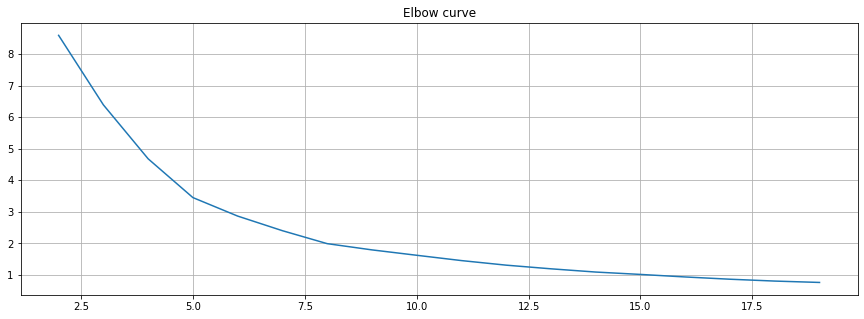

In [7]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

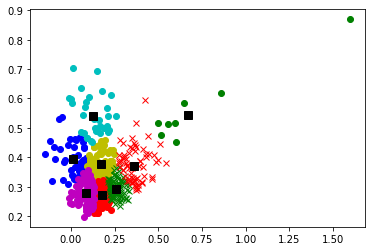

Returns       ENPH
Volatility    ENPH
dtype: object


In [13]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# computing K-Means with K = 8 (8 clusters)
centroids,_ = kmeans(data,8)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc',
     data[idx==6,0],data[idx==6,1],'xg',
     data[idx==7,0],data[idx==7,1],'xr'    
    
    )
plot(centroids[:,0],centroids[:,1],'sk',markersize=8)
show()

#identify the outlier
print(returns.idxmax())

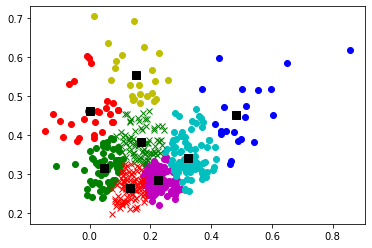

In [15]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#drop the relevant stock from our data
returns.drop('ENPH',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

# computing K-Means with K = 8 (8 clusters)
centroids,_ = kmeans(data,8)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc',
     data[idx==6,0],data[idx==6,1],'xg',
     data[idx==7,0],data[idx==7,1],'xr'    
    
    )
plot(centroids[:,0],centroids[:,1],'sk',markersize=8)
show()

In [16]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('A', 4)
('AAL', 2)
('AAP', 3)
('AAPL', 5)
('ABBV', 4)
('ABC', 7)
('ABMD', 5)
('ABT', 5)
('ACN', 4)
('ADBE', 5)
('ADI', 4)
('ADM', 7)
('ADP', 4)
('ADSK', 5)
('AEE', 7)
('AEP', 7)
('AES', 5)
('AFL', 7)
('AIG', 2)
('AIZ', 7)
('AJG', 4)
('AKAM', 7)
('ALB', 6)
('ALGN', 0)
('ALK', 2)
('ALL', 7)
('ALLE', 7)
('ALXN', 6)
('AMAT', 0)
('AMD', 0)
('AME', 4)
('AMGN', 7)
('AMP', 5)
('AMT', 4)
('AMZN', 5)
('ANET', 5)
('ANSS', 5)
('ANTM', 4)
('AON', 4)
('AOS', 7)
('APA', 1)
('APD', 4)
('APH', 4)
('APTV', 5)
('ARE', 7)
('ATO', 7)
('ATVI', 5)
('AVB', 3)
('AVGO', 5)
('AVY', 5)
('AWK', 4)
('AXP', 6)
('AZO', 7)
('BA', 1)
('BAC', 6)
('BAX', 7)
('BBY', 5)
('BDX', 7)
('BEN', 3)
('BF-B', 4)
('BIIB', 2)
('BIO', 5)
('BK', 3)
('BKNG', 6)
('BKR', 2)
('BLK', 4)
('BLL', 4)
('BMY', 7)
('BR', 4)
('BRK-B', 7)
('BSX', 4)
('BWA', 6)
('BXP', 3)
('C', 6)
('CAG', 3)
('CAH', 3)
('CAT', 5)
('CB', 7)
('CBOE', 7)
('CBRE', 5)
('CCI', 4)
('CCL', 1)
('CDNS', 0)
('CDW', 5)
('CE', 4)
('CERN', 7)
('CF', 6)
('CFG', 6)
('CHD', 7)
('CH